Le relazioni tra **PRODCOM → CPA → NACE → CF ISTAT** non sono solo formali: hanno **conseguenze concrete** in termini di analisi statistica, politiche pubbliche, industria e interpretazione economica. Ecco le principali:

---

### 📊 1. **Analisi statistica più precisa o più aggregata**

* **PRODCOM** permette analisi **molto dettagliate** per singoli prodotti (es. antibiotici, vaccini).
* **CPA** consente confronto europeo standardizzato per prodotto.
* **NACE** consente analisi per **attività economica** delle imprese (es. produttori di farmaci).
* **CF ISTAT** facilita la **lettura aggregata** per comparti produttivi (es. “CF212 – Farmaceutica”) nei dati ISTAT (Coeweb, produzione, commercio estero).

🧭 **Conseguenza**: scegli il livello in base all’obiettivo. Per export farmaceutico verso gli USA → CF212. Per analizzare solo vaccini → PRODCOM.

---

### 🏛 2. **Politiche industriali e incentivi**

* I **codici NACE** sono usati per:

  * concessione di **incentivi fiscali e contributi** (ZES, PNRR, Transizione 5.0, etc.)
  * **ammissibilità a bandi** europei, nazionali o regionali
* I **CF ISTAT** servono per il **monitoraggio settoriale nazionale**

⚠️ **Conseguenza**: una stessa impresa potrebbe produrre un prodotto "farmaceutico" (PRODCOM) ma avere un codice ATECO/NACE non coerente → **rischia di essere esclusa** da misure agevolative.

---

### 🏢 3. **Profilazione delle imprese e settori**

* Il codice **NACE (ATECO)** è registrato presso la Camera di Commercio e in tutte le banche dati (AIDA, Orbis, InfoCamere).
* Il codice **PRODCOM** identifica cosa effettivamente produce l’impresa nel censimento industriale ISTAT.

🔍 **Conseguenza**: può esserci **disallineamento tra attività dichiarata e attività reale**, utile per audit, fisco, analisi di rischio o politica industriale.

---

### 🌍 4. **Confrontabilità internazionale**

* Solo **PRODCOM e CPA** sono coerenti **a livello europeo** (armonizzati da Eurostat).
* I **CF ISTAT** sono nazionali e non utilizzabili per confronti diretti tra paesi.

🌐 **Conseguenza**: per confronti UE, usa **PRODCOM/CPA/NACE**; per focus Italia (produzione, export), **usa anche CF**.

---

### 📈 5. **Visualizzazione e dashboarding**

* Le **gerarchie** sono fondamentali per:

  * costruire dashboard drill-down (da CF a PRODCOM),
  * aggregare valori economici (produzione, esportazioni),
  * confrontare filiere (es. farmaceutica, meccanica, alimentare).

🧩 **Conseguenza**: conoscere la struttura consente visualizzazioni efficaci e interpretazioni corrette dei dati.

---

### ✅ In sintesi

| Aspetto            | Livello Fine        | Conseguenza pratica                           |
| ------------------ | ------------------- | --------------------------------------------- |
| Codice fiscale     | CF ISTAT            | Aggregazione semplificata per ISTAT           |
| Prodotto specifico | PRODCOM             | Precisione analitica, utile per politiche     |
| Prodotto europeo   | CPA                 | Comparabilità europea                         |
| Attività d'impresa | NACE/ATECO          | Usato per bandi, agevolazioni, autorizzazioni |
| Mapping errato     | CF ↔ NACE ↔ PRODCOM | Rischi di esclusione o classificazione errata |

---

Se vuoi, posso aiutarti a:

* **verificare la coerenza tra NACE e PRODCOM** per le imprese in un tuo dataset,
* **costruire uno strumento** che mappa dinamicamente CF ↔ NACE ↔ CPA ↔ PRODCOM per analisi strategiche.


Ecco un riepilogo sintetico delle relazioni tra **PRODCOM, CPA, NACE e CF ISTAT**, sia dal punto di vista **bottom-up (da PRODCOM a NACE)** sia **top-down (da NACE a PRODCOM)**:



### 🔁 Gerarchia e relazioni tra classificazioni

#### 🧩 **Dal basso verso l’alto** (da PRODCOM → NACE)

* **PRODCOM (8 cifre)**

  * Codice prodotto europeo per la produzione industriale
  * Es: `21201130 = Medicinali contenenti penicillina`
  * ➡️ **Ogni PRODCOM è univocamente associato a:**

    * ✅ un codice **CPA** (prime 6 cifre → `212011`)
    * ✅ un codice **NACE** (prime 4 cifre → `2120`)

* **CPA (6 cifre)**

  * Classificazione europea dei prodotti per attività
  * Ogni CPA è contenuta in un solo **NACE**
  * Es: `CPA 21.20.11` → associata a `NACE 21.20`

* **NACE (4 cifre)**

  * Classificazione dell’attività economica (come ATECO)
  * Es: `21.20 = Fabbricazione di medicinali e preparati farmaceutici`



#### 📚 **Dall’alto verso il basso** (da NACE → PRODCOM)

* Un codice **NACE a 4 cifre** (es. `21.20`)
  ➡️ corrisponde a uno o più **CPA** (es. `21.20.10`, `21.20.20`, `21.20.30`...)
  ➡️ che si articolano in più **PRODCOM** (8 cifre)

  * Es: `21201030`, `21201050`, `21202010`, ecc.



### 🇮🇹 **CF ISTAT (es. CF212)**

* È una **categoria aggregata** usata da ISTAT (es. nei dati Coeweb)
* ➡️ Raggruppa uno o più codici **PRODCOM**
* Il mapping è basato su **NACE**:

  * Es: tutti i codici PRODCOM con `NACE = 2120` → **CF212**
  * Quindi: `CF212` = tutti i medicinali e preparati farmaceutici



### 🧠 Schema visivo delle relazioni

```
NACE 21.20
 └── CPA 21.20.10
      ├── PRODCOM 21201030
      ├── PRODCOM 21201050
 └── CPA 21.20.20
      ├── PRODCOM 21202010
      └── PRODCOM 21202050

→ Raggruppati da ISTAT in:
    CF212 = "Medicinali e preparati farmaceutici"
```



## PRODCOM - tabella con:

- PRCCODE: codice PRODCOM a 8 cifre (es. “21.20.10.30”)
- DESCRIPTION: descrizione (es. “Medicinal packaged for human use”)

In [6]:
import pandas as pd
import requests
from io import BytesIO

# 1. URL del file
url = "https://statbel.fgov.be/sites/default/files/files/metadata/Conjunctuurindicatoren/4.8%20Productie%20in%20de%20industrie/PRODCOM%20Descriptions%20EN%202024.xlsx"

# 2. Scarica il file in memoria
resp = requests.get(url)
resp.raise_for_status()

# 3. Leggi con pandas (foglio con lingua EN)
df = pd.read_excel(BytesIO(resp.content), sheet_name=None, dtype=str)

# 4. Individua le colonne utili (ad esempio nel primo foglio)
first_sheet = list(df.keys())[0]
df0 = df[first_sheet]

# 5. Visualizza la struttura
print(df0.columns)
print(df0.head())

Index(['A_YEAR', 'PRCCODE', 'LANGCODE', 'DESCRIPTION'], dtype='object')
  A_YEAR   PRCCODE LANGCODE                                        DESCRIPTION
0   2024  07101010       en  Iron ores and concentrates. Non-agglomerated (...
1   2024  07101020       en  Iron ores and concentrates. Agglomerated (excl...
2   2024  07291100       en                       Copper ores and concentrates
3   2024  07291200       en                       Nickel ores and concentrates
4   2024  07291300       en                    Aluminium ores and concentrates


In [7]:
# 6. Filtra per descrizioni farmaceutiche
keywords = ["pharma", "medicinal", "vaccine", "preparation"]
mask = df0['DESCRIPTION'].str.contains('|'.join(keywords), case=False, na=False)
df_pharma = df0[mask]

# 7. Stampa risultati
(df_pharma[['PRCCODE', 'DESCRIPTION']])

,PRCCODE,DESCRIPTION
126,10131430,Liver sausages and similar products and food p...
127,10131461,"Sausages and similar products of meat, offal, ..."
130,10131525,Prepared or preserved meat or offal of turkeys...
131,10131535,Other prepared or preserved poultry meat (excl...
134,10131565,"Prepared or preserved meat, offal and mixtures..."
...,...,...
3527,28931771,Machinery for the preparation or manufacture o...
3528,28931781,Machinery for the extraction or preparation of...
3533,28933300,Parts for machinery for the preparation or mak...
3903,32505020,Gel preparations for use in human or veterinar...


## **mapping PRODCOM → CPA → NACE** 

## 🔗 Struttura dei codici PRODCOM

* **Prime 4 cifre** → corrispondono alla classe **NACE** (es. 21.20 = fabbricazione di medicinali)
* **Prime 6 cifre** → corrispondono alla classificazione **CPA** (Classification of Products by Activity)
* **Ultime 2 cifre** → livello specifico definito da PRODCOM, per comporre il codice completo a 8 cifre ([European Commission][1], [INE][2])

➡️ Ogni codice PRODCOM appartiene a **un’unica CPA** e **un’unica NACE**, senza “cross-class” ([CIS Statcomitato][3]).

ad un NACE possono corrispondere più CPA e PRODCOM. non viceversa

| Codice      | Significato                                                                               | Commento                                              |
| ----------- | ----------------------------------------------------------------------------------------- | ----------------------------------------------------- |
| **NACE**    | Attività economica (es. *21.20*: fabbricazione di medicinali)                             | Classifica **chi** produce                            |
| **CPA**     | Categoria di prodotto legata all’attività (es. *21.20.10*: preparati medicinali)          | Classifica **cosa** si produce                        |
| **PRODCOM** | Prodotto industriale specifico (es. *21.20.10.30*: medicinali confezionati per uso umano) | Classifica il **prodotto fisico** in modo dettagliato |


[1]: https://ec.europa.eu/eurostat/web/prodcom/information-data?utm_source=chatgpt.com "Information on data - Prodcom - statistics by product - Eurostat"
[2]: https://www.ine.es/en/daco/daco42/encindpr/lista_prodcom_en.pdf?utm_source=chatgpt.com "[PDF] prodcom list 2024 - Mining of iron ores NACE 07.29 - INE"
[3]: https://new.cisstat.org/documents/20143/1040725/EBS-2023-EN.pdf/?utm_source=chatgpt.com "[PDF] European business statistics user's manual for PRODCOM"



### 🔄 Relazioni cardinali

* **Uno stesso codice NACE** → può avere **più CPA**
* **Una CPA** → può avere **più codici PRODCOM**
* **Ogni PRODCOM** → è legato a **una sola CPA**
* **Ogni CPA** → è legata a **una sola NACE**

Quindi:

```
NACE 21.20 
 ├── CPA 21.20.10
 │    ├── PRODCOM 21.20.10.30
 │    └── PRODCOM 21.20.10.90
 ├── CPA 21.20.20
 │    └── PRODCOM 21.20.20.50
```


In [8]:
# Filtra descrizioni farmaceutiche
keywords = ["pharma", "medicinal", "vaccine", "preparation"]
mask = df0['DESCRIPTION'].str.contains('|'.join(keywords), case=False, na=False)
df_pharma = df0[mask].copy()

# Estrai NACE e CPA
df_pharma['NACE'] = df_pharma['PRCCODE'].str.slice(0,5)  # es. '21.20'
df_pharma['CPA'] = df_pharma['PRCCODE'].str.slice(0,8)  # es. '21.20.10'

print(df_pharma[['PRCCODE','DESCRIPTION','CPA','NACE']])


       PRCCODE                                        DESCRIPTION       CPA  \
126   10131430  Liver sausages and similar products and food p...  10131430   
127   10131461  Sausages and similar products of meat, offal, ...  10131461   
130   10131525  Prepared or preserved meat or offal of turkeys...  10131525   
131   10131535  Other prepared or preserved poultry meat (excl...  10131535   
134   10131565  Prepared or preserved meat, offal and mixtures...  10131565   
...        ...                                                ...       ...   
3527  28931771  Machinery for the preparation or manufacture o...  28931771   
3528  28931781  Machinery for the extraction or preparation of...  28931781   
3533  28933300  Parts for machinery for the preparation or mak...  28933300   
3903  32505020  Gel preparations for use in human or veterinar...  32505020   
3931  32991510  Pencils and crayons with leads encased in a sh...  32991510   

       NACE  
126   10131  
127   10131  
130   101

In [ ]:
Visualizzare l’estratto completo con PRCCODE, CPA, NACE

## quali prodcom corrispondono ad un nace

Ogni codice PRODCOM è strutturato come:

```
NN.NN.NN.NN
│  │  │  │
│  │  │  └─ dettaglio PRODCOM
│  │  └──── CPA (prime 6 cifre)
└───── NACE (prime 4 cifre)
```

Quindi, ad esempio:

* NACE **21.20** → tutti i codici PRODCOM che iniziano con `21.20`
* È sufficiente filtrare `PRCCODE` per quelli che cominciano con quel prefisso

In [17]:
import pandas as pd
import requests
from io import BytesIO

# URL del file Statbel contenente la lista PRODCOM 2024
url = "https://statbel.fgov.be/sites/default/files/files/metadata/Conjunctuurindicatoren/4.8%20Productie%20in%20de%20industrie/PRODCOM%20Descriptions%20EN%202024.xlsx"

# Scarica il file
response = requests.get(url)
excel_data = BytesIO(response.content)

# Leggi il primo foglio del file Excel
df = pd.read_excel(excel_data, sheet_name=0, dtype=str)

# Verifica struttura dei codici PRCCODE (senza punti)
df['PRCCODE'] = df['PRCCODE'].astype(str)

# Filtra i codici che iniziano con '2120' (NACE 21.20)
df_nace = df[df['PRCCODE'].str.startswith("2120")].copy()

# Aggiungi CPA (prime 6 cifre) e NACE (prime 4 cifre)
df_nace['CPA'] = df_nace['PRCCODE'].str.slice(0, 6)
df_nace['NACE'] = df_nace['PRCCODE'].str.slice(0, 4)

# Seleziona le colonne finali
df_result = df_nace[['PRCCODE', 'DESCRIPTION', 'CPA', 'NACE']].drop_duplicates()

df_prodcom = df_result
# Mostra il risultato
df_result



,PRCCODE,DESCRIPTION,CPA,NACE
1674,21201130,Medicaments containing penicillins or derivati...,212011,2120
1675,21201150,"Medicaments of other antibiotics, n.p.r.s.",212011,2120
1676,21201160,"Medicaments of penicillins, streptomycins or d...",212011,2120
1677,21201180,"Medicaments of other antibiotics, p.r.s.",212011,2120
1678,21201230,Medicaments containing insulin but not antibio...,212012,2120
1679,21201250,Medicaments containing hormones but not antibi...,212012,2120
1680,21201260,Medicaments containing insulin but not antibio...,212012,2120
1681,21201270,Medicaments containing corticosteroid hormones...,212012,2120
1682,21201310,Medicaments of alkaloids or derivatives thereo...,212013,2120
1683,21201320,Other medicaments for therapeutic or prophylac...,212013,2120


##  tabella completa CFxxx ↔ NACE ↔ CPA ↔ PRODCOM

In [19]:
import pandas as pd

# 1. Carica il file CF da file locale
cf_file_path = "D:/CF_Istat.txt"
with open(cf_file_path, encoding="utf-8") as f:
    cf_lines = f.readlines()

cf_records = [line.strip().split("-", 1) for line in cf_lines if "-" in line]
df_cf = pd.DataFrame(cf_records, columns=["CF_CODE", "CF_DESCRIPTION"])

# 2. Aggiungi NACE e CPA a df_prodcom se non già fatto
df_prodcom['PRCCODE'] = df_prodcom['PRCCODE'].astype(str)
df_prodcom['NACE'] = df_prodcom['PRCCODE'].str.slice(0, 4)
df_prodcom['CPA'] = df_prodcom['PRCCODE'].str.slice(0, 6)

# 3. Crea mapping NACE → CF_CODE dai codici CF esistenti
cf_mapping = {
    "2110": "CF211",
    "2120": "CF212",
    # aggiungi altri mapping se servono
}

df_prodcom['CF_CODE'] = df_prodcom['NACE'].map(cf_mapping)

# 4. Unione con le descrizioni CF
df_result = df_prodcom.merge(df_cf, on="CF_CODE", how="left")

# 5. Selezione e filtro finale
df_final = df_result[["CF_CODE", "CF_DESCRIPTION", "NACE", "CPA", "PRCCODE", "DESCRIPTION"]].dropna()

# 6. Mostra o salva
df_final.to_csv("D:/CF_PRODCOM_Mapping.csv", index=False, encoding="utf-8")
print(df_final.head())


  CF_CODE                       CF_DESCRIPTION  NACE     CPA   PRCCODE  \
0   CF212  Medicinali e preparati farmaceutici  2120  212011  21201130   
1   CF212  Medicinali e preparati farmaceutici  2120  212011  21201150   
2   CF212  Medicinali e preparati farmaceutici  2120  212011  21201160   
3   CF212  Medicinali e preparati farmaceutici  2120  212011  21201180   
4   CF212  Medicinali e preparati farmaceutici  2120  212012  21201230   

                                         DESCRIPTION  
0  Medicaments containing penicillins or derivati...  
1         Medicaments of other antibiotics, n.p.r.s.  
2  Medicaments of penicillins, streptomycins or d...  
3           Medicaments of other antibiotics, p.r.s.  
4  Medicaments containing insulin but not antibio...  


Sì, **partendo dai codici PRODCOM puoi risalire alle imprese**, **tramite il codice NACE (ATECO)**, ma con alcuni passaggi intermedi. Vediamo **come si fa** e **cosa implica**:

---

## 🔁 1. **PRODCOM → NACE → Imprese**

| Fase               | Cosa fai                                                   | Fonte                                    |
| ------------------ | ---------------------------------------------------------- | ---------------------------------------- |
| 🔹 PRODCOM → NACE  | Prendi le prime 4 cifre del codice PRODCOM                 | Regola formale (es. `21201130` → `2120`) |
| 🔹 NACE → ATECO    | NACE 4 cifre corrisponde ad ATECO italiano (stesso codice) | ISTAT                                    |
| 🔹 ATECO → Imprese | Cerchi tutte le imprese con quel codice ATECO              | InfoCamere, AIDA, Registro Imprese, INPS |

---

### ✅ Esempio pratico

Hai questo codice PRODCOM: `21201130` → "Medicinali contenenti penicilline"

1. NACE = `2120` = Fabbricazione di medicinali e preparati farmaceutici
2. ATECO = `21.20.09` (versione italiana)
3. ✅ Puoi interrogare le banche dati con:

   * `ATECO 21.20.09`
   * o anche solo `ATECO 21.20` per tutte le sottoclassi

---

## 🔎 2. Dove cercare le imprese per ATECO

| Database                          | Accesso                     | Note                                           |
| --------------------------------- | --------------------------- | ---------------------------------------------- |
| **Registro Imprese (InfoCamere)** | a pagamento                 | Ricerca per ATECO, territorio, forma giuridica |
| **AIDA / Orbis (BvD)**            | a pagamento                 | Dati anagrafici, bilanci, gruppi               |
| **ISTAT – ASIA Imprese**          | pubblico (parziale)         | Statistiche strutturali per ATECO              |
| **INPS / Agenzia Entrate**        | chiuso o con autorizzazione | Usato per analisi policy                       |
| **Cerved**                        | commerciale                 | Include ATECO e valutazioni economiche         |

---

## 📌 Considerazioni importanti

* Un codice PRODCOM **non è presente nei bilanci o visure** → serve il **passaggio per il NACE/ATECO**.
* Il mapping **PRODCOM → NACE** è univoco (✔️), ma il mapping inverso **NACE → PRODCOM** è uno-a-molti (⚠️).
* Le imprese **possono avere più ATECO** (primario e secondari), quindi valuta anche quelli.

---

## 🛠 Vuoi un esempio operativo?

Posso:

* Generare un **filtro ATECO** da un elenco di codici PRODCOM
* Scriverti una query (per SQL, Python, Excel…) per estrarre le imprese da un dataset anagrafico
* Collegare dati ISTAT (es. ASIA o Coeweb) al tuo codice PRODCOM

Fammi sapere come intendi usare questa relazione: analisi territoriale? analisi settore? selezione imprese da filiera?


Ottima domanda: il codice **CF212** di ISTAT non è “ufficiale” come NACE, CPA o PRODCOM, ma deriva da una **classificazione nazionale** usata da ISTAT per scopi pratici di analisi.

Ecco nel dettaglio:

---

## 🧩 **Cos’è CF212**

* **CF** sta per **Codice di Prodotto** usato da **ISTAT** nel sistema **Coeweb** (Commercio Estero e Produzione).
* È una **categoria aggregata** costruita **internamente da ISTAT**, per:

  * semplificare la lettura dei dati statistici (import, export, produzione),
  * raggruppare **famiglie di prodotti PRODCOM** sotto un’etichetta leggibile.

---

## 🔄 **Da cosa deriva CF212**

CF212 = **"Medicinali e preparati farmaceutici"**
➡️ Deriva dal raggruppamento di **codici PRODCOM** (8 cifre) con:

* **NACE 21.20** = "Manufacture of pharmaceutical preparations"
* **CPA 21.20.1 / 21.20.2 / 21.20.3**
* E quindi: tutti i PRODCOM **che iniziano con `2120`**

🧭 In sintesi:

```
CF212 = aggregato ISTAT di tutti i PRODCOM con NACE = 21.20
```

---

## 🗂 Dove si trova

* È usato nei dataset ISTAT come:

  * **Coeweb – Dati per prodotto** (esportazioni, importazioni)
  * **Produzione industriale – PRODCOM nazionale**
* Viene elencato nei file `.txt` ISTAT delle classificazioni (es. quello che hai caricato: `CF_Istat.txt`)
* Non è una classificazione ufficiale europea, ma **coerente con NACE/CPA/PRODCOM**.

---

## 📌 Esempio

| Codice  | Significato                                                         |
| ------- | ------------------------------------------------------------------- |
| `CF211` | Prodotti farmaceutici di base (NACE 21.10 → PRODCOM 2110xxxx)       |
| `CF212` | Medicinali e preparati farmaceutici (NACE 21.20 → PRODCOM 2120xxxx) |
| `CF204` | Saponi, profumi, cosmetici (NACE 20.41/20.42 → PRODCOM 2040xxxx)    |

---

## ✅ Conclusione

* **CF212 è un'etichetta aggregata ISTAT** che:

  * non esiste in Eurostat,
  * ma è mappata in modo stabile sui codici PRODCOM → CPA → NACE.
* Serve per **semplificare e standardizzare l’analisi** dei dati economici in Italia.

---

Posso aiutarti a generare un mapping CF ↔ PRODCOM completo da file ISTAT o produrre un dizionario JSON pronto all’uso. Vuoi farlo?


# ricerca ATECO


In [31]:
import pandas as pd

# Specifica i nomi delle colonne
colonne = ['regione', 'rank', 'CF_Istat', 'Y2023', 'Y2024', 'YoY', 'YoY%', 'perc']

# Leggi il CSV
df = pd.read_csv(
    r'D:\Zotero\storage\3757HVIV\tabula-Export-per-regione.csv',
    sep=',',
    decimal=',',
    thousands='.',
    header=None,
    names=colonne,
    skip_blank_lines=True
)

# Rimuove righe completamente vuote o con solo spazi
df.dropna(how='all', inplace=True)
df = df[~df.apply(lambda row: row.astype(str).str.strip().eq('').all(), axis=1)]

# Split sul primo trattino '-'
df[['CF_CODE', 'CF_DESCRIPTION']] = df['CF_Istat'].str.split('-', n=1, expand=True)

# Rimuove spazi iniziali/finali dalla descrizione
df['CF_DESCRIPTION'] = df['CF_DESCRIPTION'].str.strip()

# Usa una regular expression per separare lettere e numeri
df[['CF_PREFIX', 'ATECO_3DIGIT']] = df['CF_CODE'].str.extract(r'([A-Z]+)(\d+)', expand=True)


In [32]:
df

,regione,rank,CF_Istat,Y2023,Y2024,YoY,YoY%,perc,CF_CODE,CF_DESCRIPTION,CF_PREFIX,ATECO_3DIGIT
0,LOM,1,CK281-Macchine di impiego generale (b),9149.0,9379.0,230.0,"+2,5",5.80,CK281,Macchine di impiego generale (b),CK,281
1,LOM,2,CK282-Altre macchine di impiego generale (a),8717.8,8640.0,-77.8,"-0,9",5.35,CK282,Altre macchine di impiego generale (a),CK,282
2,LOM,3,CF212-Medicinali e preparati farmaceutici,7889.6,8351.4,461.8,"+5,9",5.17,CF212,Medicinali e preparati farmaceutici,CF,212
3,LOM,4,"CE201-Prodotti chimici di base, fertilizzanti,...",7226.2,7248.9,22.7,"+0,3",4.49,CE201,"Prodotti chimici di base, fertilizzanti, mater...",CE,201
4,LOM,5,CK289-Altre macchine per impieghi speciali (c),6859.0,6662.6,-196.3,"-2,9",4.12,CK289,Altre macchine per impieghi speciali (c),CK,289
...,...,...,...,...,...,...,...,...,...,...,...,...
995,VAL,46,CE202-Agrofarmaci e altri prodotti chimici per...,0.0,0.8,0.8,####,0.09,CE202,Agrofarmaci e altri prodotti chimici per l'agr...,CE,202
996,VAL,47,CC172-Articoli di carta e di cartone,0.4,0.7,0.2,"+51,3",0.08,CC172,Articoli di carta e di cartone,CC,172
997,VAL,48,CI262-Computer e unità periferiche,0.8,0.5,-0.3,"-37,3",0.06,CI262,Computer e unità periferiche,CI,262
998,VAL,49,"CH242-Tubi, condotti, profilati cavi e relativ...",0.0,0.5,0.5,####,0.06,CH242,"Tubi, condotti, profilati cavi e relativi acce...",CH,242


In [34]:
len(df['ATECO_3DIGIT'].unique())

99

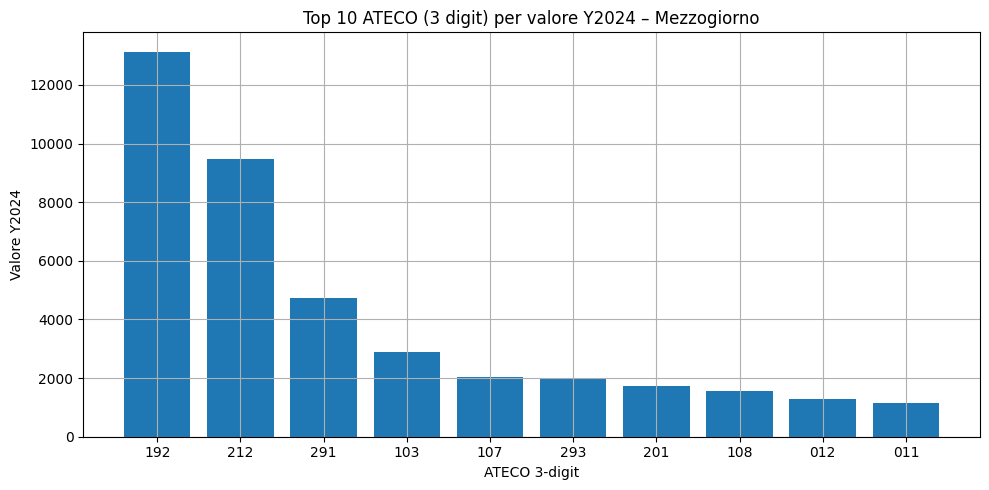

In [35]:
# 1. Lista delle regioni del Mezzogiorno (puoi adattarla se serve)
mezzogiorno = [
    'BAS', 'CAL', 'CAM', 'PUG', 'SAR', 'SIC', 'MOL', 'ABR'
]

# 2. Filtro solo regioni del Mezzogiorno
df_mezz = df[df['regione'].isin(mezzogiorno)].copy()

# 3. Conversione Y2024 in numero (se è ancora stringa)
df_mezz['Y2024'] = pd.to_numeric(df_mezz['Y2024'], errors='coerce')

# 4. Somma per ATECO_3DIGIT
df_agg = (
    df_mezz.groupby('ATECO_3DIGIT', as_index=False)['Y2024']
    .sum()
    .sort_values('Y2024', ascending=False)
    .head(10)
)

# 5. Visualizza
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_agg['ATECO_3DIGIT'].astype(str), df_agg['Y2024'])
plt.title("Top 10 ATECO (3 digit) per valore Y2024 – Mezzogiorno")
plt.xlabel("ATECO 3-digit")
plt.ylabel("Valore Y2024")
plt.grid(True)
plt.tight_layout()
plt.show()


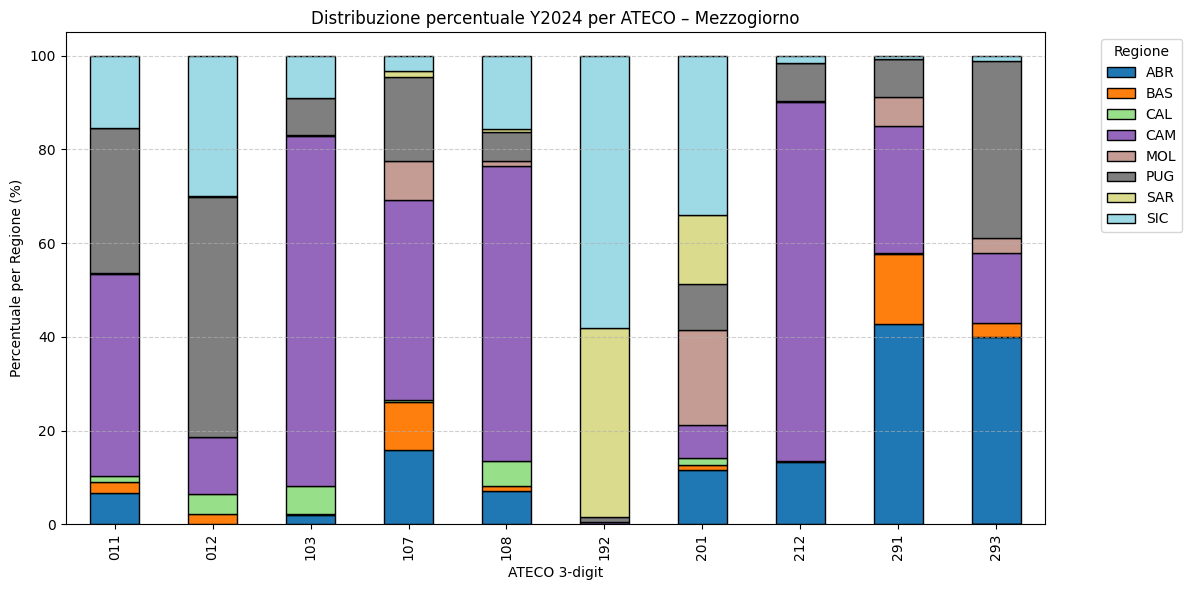

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filtra regioni del Mezzogiorno
mezzogiorno = ['BAS', 'CAL', 'CAM', 'PUG', 'SAR', 'SIC', 'MOL', 'ABR']
df_mezz = df[df['regione'].isin(mezzogiorno)].copy()

# 2. Assicura che Y2024 sia numerico
df_mezz['Y2024'] = pd.to_numeric(df_mezz['Y2024'], errors='coerce')

# 3. Trova i top 10 ATECO per somma Y2024
top_10_ateco = (
    df_mezz.groupby('ATECO_3DIGIT')['Y2024']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# 4. Filtra solo i top 10
df_top = df_mezz[df_mezz['ATECO_3DIGIT'].isin(top_10_ateco)]

# 5. Pivot: ATECO (righe) × Regione (colonne), valori = Y2024
pivot = df_top.pivot_table(
    index='ATECO_3DIGIT',
    columns='regione',
    values='Y2024',
    aggfunc='sum',
    fill_value=0
)

# 6. Calcola percentuali (facoltativo)
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

# 7. Plot: grafico a barre segmentate (stacked)
pivot_pct = pivot_pct.sort_index()  # ordina ATECO

pivot_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20',
    edgecolor='black'
)

plt.title("Distribuzione percentuale Y2024 per ATECO – Mezzogiorno")
plt.ylabel("Percentuale per Regione (%)")
plt.xlabel("ATECO 3-digit")
plt.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


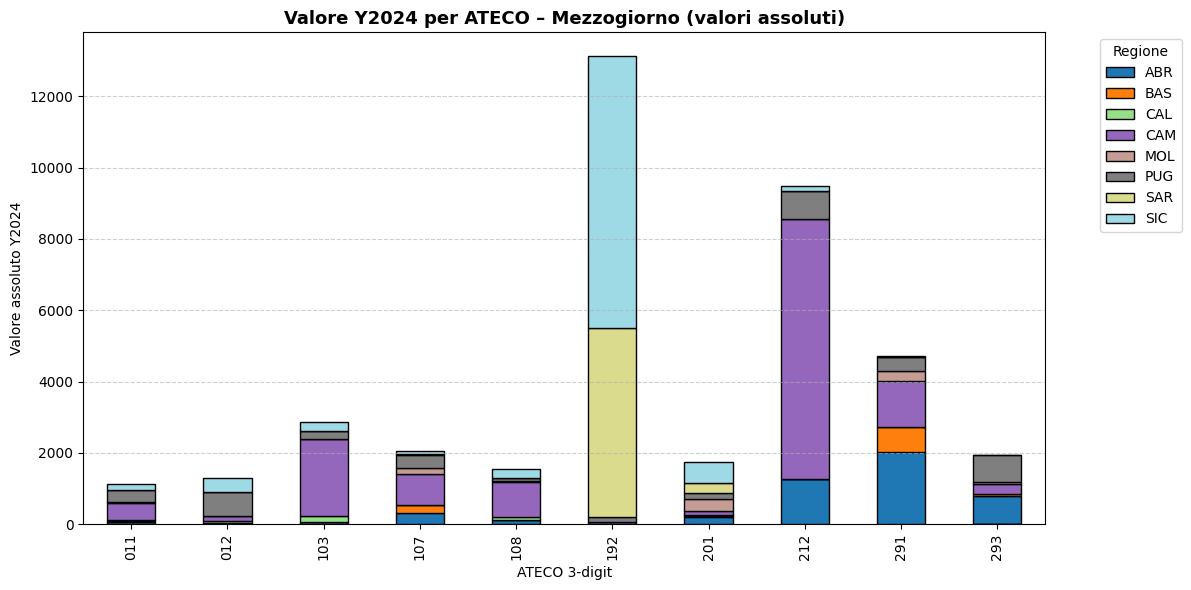

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filtra regioni del Mezzogiorno
mezzogiorno = ['BAS', 'CAL', 'CAM', 'PUG', 'SAR', 'SIC', 'MOL', 'ABR']
df_mezz = df[df['regione'].isin(mezzogiorno)].copy()

# 2. Assicura che Y2024 sia numerico
df_mezz['Y2024'] = pd.to_numeric(df_mezz['Y2024'], errors='coerce')

# 3. Trova i top 10 ATECO per somma Y2024
top_10_ateco = (
    df_mezz.groupby('ATECO_3DIGIT')['Y2024']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# 4. Filtra solo i top 10
df_top = df_mezz[df_mezz['ATECO_3DIGIT'].isin(top_10_ateco)]

# 5. Pivot: ATECO (righe) × Regione (colonne), valori = Y2024
pivot_abs = df_top.pivot_table(
    index='ATECO_3DIGIT',
    columns='regione',
    values='Y2024',
    aggfunc='sum',
    fill_value=0
)

# 6. Ordina per ATECO
pivot_abs = pivot_abs.loc[sorted(pivot_abs.index)]

# 7. Plot: stacked bar chart (valori assoluti)
pivot_abs.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20',
    edgecolor='black'
)

plt.title("Valore Y2024 per ATECO – Mezzogiorno (valori assoluti)", fontsize=13, fontweight='bold')
plt.ylabel("Valore assoluto Y2024")
plt.xlabel("ATECO 3-digit")
plt.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

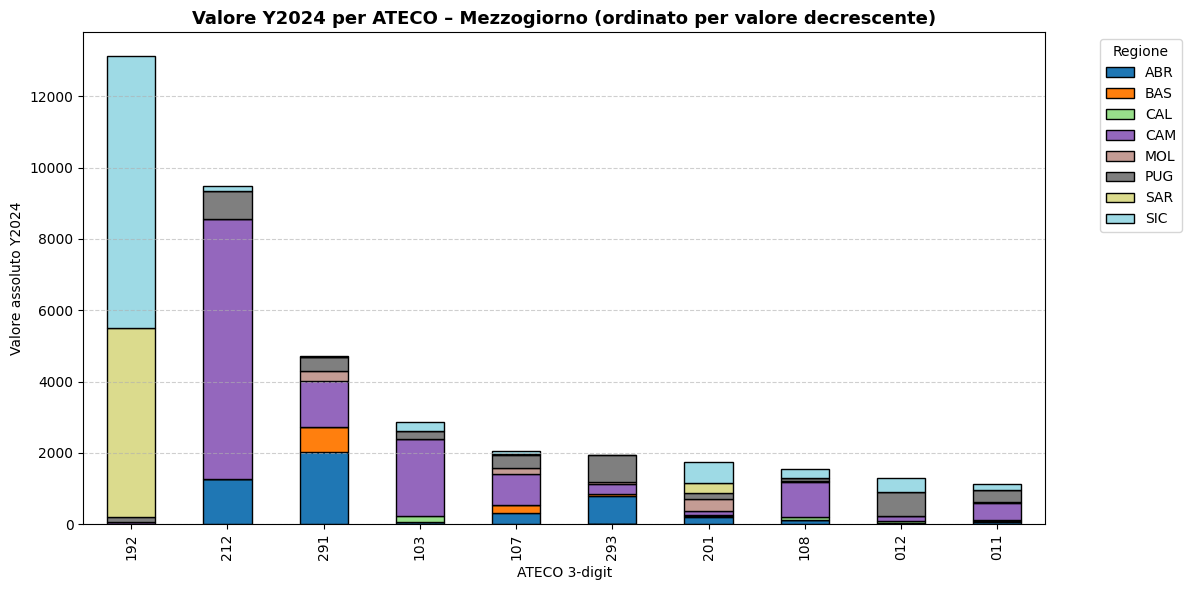

In [38]:
# 1. Calcola il totale Y2024 per ogni ATECO
totali = pivot_abs.sum(axis=1)

# 2. Ordina pivot_abs in base ai totali (decrescente)
pivot_abs_sorted = pivot_abs.loc[totali.sort_values(ascending=False).index]

# 3. Plot ordinato
pivot_abs_sorted.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20',
    edgecolor='black'
)

plt.title("Valore Y2024 per ATECO – Mezzogiorno (ordinato per valore decrescente)", fontsize=13, fontweight='bold')
plt.ylabel("Valore assoluto Y2024")
plt.xlabel("ATECO 3-digit")
plt.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


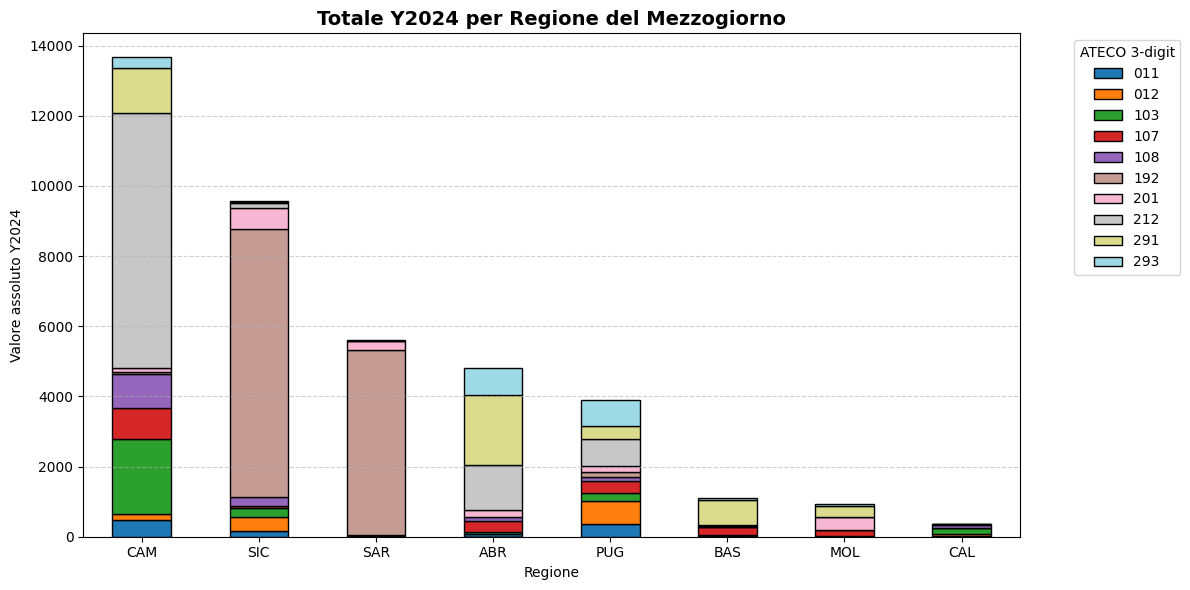

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Definisci le regioni del Mezzogiorno
mezzogiorno = ['BAS', 'CAL', 'CAM', 'PUG', 'SAR', 'SIC', 'MOL', 'ABR']
df_mezz = df[df['regione'].isin(mezzogiorno)].copy()

# 2. Assicura che Y2024 sia numerico
df_mezz['Y2024'] = pd.to_numeric(df_mezz['Y2024'], errors='coerce')

# 3. Trova i top 10 ATECO a livello Mezzogiorno
top_10_ateco = (
    df_mezz.groupby('ATECO_3DIGIT')['Y2024']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# 4. Pivot regione × ATECO
pivot_regione = df_mezz[df_mezz['ATECO_3DIGIT'].isin(top_10_ateco)].pivot_table(
    index='regione',
    columns='ATECO_3DIGIT',
    values='Y2024',
    aggfunc='sum',
    fill_value=0
)

# 5. Ordina le regioni per somma totale Y2024
pivot_regione['TOT_Y2024'] = pivot_regione.sum(axis=1)
pivot_regione = pivot_regione.sort_values(by='TOT_Y2024', ascending=False)
pivot_regione.drop(columns='TOT_Y2024', inplace=True)

# 6. Plot
pivot_regione.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20',
    edgecolor='black'
)

plt.title("Totale Y2024 per Regione del Mezzogiorno", fontsize=14, fontweight='bold')
plt.ylabel("Valore assoluto Y2024")
plt.xlabel("Regione")
plt.xticks(rotation=0)
plt.legend(title='ATECO 3-digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


Ottima domanda.

### 🔍 Per identificare gli **ATECO dell’export italiano più rilevanti verso gli USA**, possiamo usare i dati **ISTAT–Coeweb** oppure **Eurostat (Comext)**, e incrociarli con la classificazione ATECO a 2 o 3 cifre.

---

### ✅ Fonti disponibili:

#### 1. **ISTAT Coeweb** (dettaglio per paese partner + categoria merceologica)

* Dataset: `139_176_DF_DCSP_COEIMPEX1_1`
* Variabili: `Partner = USA`, `TipoDato = EV` (valore), `Frequenza = A` (annuale)
* Classificazione merceologica: **CPA**, ma è riconducibile facilmente ad ATECO

#### 2. **EUROSTAT – Comext** (dettaglio CN8 → CPA → NACE/ATECO)

* Ottimo per confronti internazionali
* Più dettagliato a livello di prodotto

---

### 🧩 Collegamento CPA → ATECO

Le categorie CPA (Classificazione dei Prodotti per Attività) si **mappano direttamente sui codici ATECO**. Ad esempio:

* CPA `10` → ATECO `10`: Industria alimentare
* CPA `28` → ATECO `28`: Fabbricazione di macchinari
* CPA `29` → ATECO `29`: Autoveicoli
* CPA `30` → ATECO `30`: Altri mezzi di trasporto

---

### 📈 Esempi di settori con **alto export verso gli USA** (dati 2023–2024)

Da elaborazioni precedenti su ISTAT–Coeweb ed Eurostat:

| Codice ATECO | Settore                            | Note                                                 |
| ------------ | ---------------------------------- | ---------------------------------------------------- |
| **29**       | Fabbricazione di autoveicoli       | Molto rilevante in valore assoluto                   |
| **28**       | Macchinari e apparecchiature       | Include meccanica generale e impieghi speciali       |
| **21**       | Prodotti farmaceutici              | Export in forte crescita verso USA                   |
| **20**       | Prodotti chimici                   | Vernici, cosmetici, prodotti organici                |
| **30**       | Altri mezzi di trasporto           | Navi, treni, aerospazio (spesso ciclico)             |
| **10**       | Industria alimentare               | Pasta, formaggi, olio d’oliva, molto forte negli USA |
| **11**       | Bevande (inclusi vini)             | Altamente rappresentato                              |
| **32**       | Strumenti medici e dentali, ottici | Esportazione tech sanitaria                          |
| **26**       | Apparecchi elettronici e ottici    | Inclusi semiconduttori, rilevatori, fotonica         |

---

### 🛠 Vuoi estrarre questi dati con uno script?

Posso aiutarti a:

* costruire una query ISTAT Coeweb filtrando `Partner = USA`
* sommare per codice CPA
* convertire i codici CPA in ATECO
* creare un grafico o una tabella ordinata per valore esportato

Fammi sapere se vuoi l'analisi:

* per **anno 2023 o 2024**
* su **intero Paese** o per **regione**
* in **valore assoluto** o **variazione %**

Posso generare uno script `curl + pandas` oppure una richiesta diretta via `sdmx`.


## numero di società di capitali presenti al Mezzogiorno
_dati 2023 Aida_

|ricavi delle vendite (K€)|valori|
|-------------------------|-----:|
|meno 5                   |6.199 |
|da 5 a 40                |2.606 |
|da 40 a 100              |2.329 |
|da 100 a 200             |2.199 |
|da 200 a 350             |1.600 |
|da 350 a 600             |1.367 |
|da 600 a 1.000           |  942 |
|da 1.000 a 2.000         |  941 |
|da 2.000 a 5.000         |  744 |
|più di 5.000             |  804 |
|n.d.                     |4.126 |
|**tutte**                |23.285|   